## Tweet Analysis of Indian Political Parties

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Some basic terminologies:
1. Tokenization: Word Tokenizer is used to break the sentence into separate words or tokens. NLTK library provides us a very useful function called 'word_tokenize' which helps us to tokenize each word.
2. POS Tagging: POS tag indicates that how a word functions with its meaning as well as grammatically within the sentences. A word has one or more parts of speech based on the context in which it is used. <br>
Sometimes we say just google it. Here we use google as verb although it is a proper noun.


#### Imports:

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import tqdm

#### Twitter Account Analysis of BJP4India

In [3]:
# load the data
df1 = pd.read_csv("/content/drive/MyDrive/Data/INCIndia.csv")

In [4]:
# print the first 5 rows of data
df1.head()

,Datetime,Tweet Id,Text,Username,likeCount
0,2023-06-06 15:33:28+00:00,1666106037743816705,हरियाणा में BJP सरकार ने किसानों पर लाठियां चल...,INCIndia,7884
1,2023-06-06 14:00:02+00:00,1666082522214846464,विकास काल विनाश काल...,INCIndia,12729
2,2023-06-06 13:00:02+00:00,1666067423248654338,288 मौतों का जिम्मेदार कौन?\n\nPM मोदी चुप हैं...,INCIndia,2827
3,2023-06-06 12:00:02+00:00,1666052324614086660,वो तस्वीरें जो PM मोदी के प्रचार में दबा दी गई...,INCIndia,3356
4,2023-06-06 11:00:01+00:00,1666037220216799232,मोदी सरकार और रेल मंत्री ने 'कवच' का प्रचार तो...,INCIndia,2363


In [5]:
# print the last 5 rows of data
df1.tail()

,Datetime,Tweet Id,Text,Username,likeCount
103777,2013-08-05 11:30:00+00:00,364347554852769792,Every 5th Rural Household In India Benefits fr...,INCIndia,6
103778,2013-08-05 03:11:20+00:00,364222059586387970,An India Free of Hunger\n\nSardar Vallabhbhai ...,INCIndia,4
103779,2013-08-04 13:33:36+00:00,364016271936864258,185% increase in Per Capita Income\n\nIndia ha...,INCIndia,5
103780,2013-08-04 02:43:21+00:00,363852629966733313,"India First, Always! \n\nFor the Indian Nation...",INCIndia,3
103781,2013-08-03 14:05:10+00:00,363661824988020736,"Congress President Writes To PM, Expressing Co...",INCIndia,2


In [6]:
# print the dimensions of the dataframe
df1.shape

(103782, 5)

In [7]:
# mean of the likeCount
df1['likeCount'].mean()

978.1648937195275

In [8]:
# first date of the tweet and last date of the tweet
print("Latest tweet date: ", df1['Datetime'].max())
print("Oldest tweet date: ", df1['Datetime'].min())

Latest tweet date:  2023-06-06 15:33:28+00:00
Oldest tweet date:  2013-08-03 14:05:10+00:00


In [9]:
# print columns
df1.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'likeCount'], dtype='object')

Segregate the tweets based on their language

In [12]:
# install langdetect
!pip3 install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=e8d102648656cc59fecb86cb7e01e07db595a306784370ab496a78fd7128c238
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [13]:
from langdetect import detect

# Create separate dataframes for English and Hindi tweets
english_tweets = []
hindi_tweets = []

# Iterate over each tweet
for index, row in df1.iterrows():
    tweet_text = row['Text']
    try:
        lang = detect(tweet_text)
        if lang == 'en':
            english_tweets.append(row)
        elif lang == 'hi':
            hindi_tweets.append(row)
    except:
        # Handle any errors during language detection
        pass

# Convert the English and Hindi tweets lists to dataframes
english_tweets_df = pd.DataFrame(english_tweets)
hindi_tweets_df = pd.DataFrame(hindi_tweets)

Cleaning the text. Removing any symbols and unnecessary characters from the text for making it useful for further processing.

In [14]:
def clean_text(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    clean_text = re.sub(r'\s+', ' ', clean_text)
    return clean_text

In [15]:
english_tweets_df['Text'] = english_tweets_df['Text'].apply(clean_text)

In [16]:
english_tweets_df.shape

(57936, 5)

In [17]:
english_tweets_df.head()

,Datetime,Tweet Id,Text,Username,likeCount
11,2023-06-06 06:49:01+00:00,1665974056200577029,LIVE Congress party briefing by Ms SupriyaShri...,INCIndia,2758
19,2023-06-06 01:05:46+00:00,1665887671905062913,On his birth anniversary we pay homage to free...,INCIndia,881
27,2023-06-05 10:32:40+00:00,1665667947837390855,LIVE Congress party briefing by Shri BHAKTACHA...,INCIndia,994
32,2023-06-05 06:01:41+00:00,1665599753730809856,Congress President Shri kharge writes a letter...,INCIndia,1582
39,2023-06-05 01:28:50+00:00,1665531090872975360,As India ranks last in the Environment Perform...,INCIndia,1018


In [18]:
hindi_tweets_df.shape

(44051, 5)

In [19]:
hindi_tweets_df.head()

,Datetime,Tweet Id,Text,Username,likeCount
0,2023-06-06 15:33:28+00:00,1666106037743816705,हरियाणा में BJP सरकार ने किसानों पर लाठियां चल...,INCIndia,7884
2,2023-06-06 13:00:02+00:00,1666067423248654338,288 मौतों का जिम्मेदार कौन?\n\nPM मोदी चुप हैं...,INCIndia,2827
3,2023-06-06 12:00:02+00:00,1666052324614086660,वो तस्वीरें जो PM मोदी के प्रचार में दबा दी गई...,INCIndia,3356
4,2023-06-06 11:00:01+00:00,1666037220216799232,मोदी सरकार और रेल मंत्री ने 'कवच' का प्रचार तो...,INCIndia,2363
6,2023-06-06 08:56:31+00:00,1666006139446648832,जब प्रधानमंत्री या रेल मंत्री घटना स्थल पर जात...,INCIndia,4392


Translate first 5000 Hindi tweets in english and append them to english tweets dataframe

In [20]:
# take only first 5000 tweets from hindi_tweets_df
hindi_tweets_df = hindi_tweets_df[:5000]

In [21]:
# converting hindi tweets to english
!pip3 install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=7113d4e04b6f4740d25e32200830c68be7ab1d5b966c81d712bbde289354406c
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans


In [22]:
from googletrans import Translator

# Create an empty translator object
translator = Translator()

In [23]:
translation = translator.translate("महिलाओं की प्रगति से सुनिश्चित होती देश की उन्नति\n\nमोदी सरकार द्वारा महिलाओं के सशक्तिकरण हेतु तय बजट में वर्ष 2013-14 के मुकाबले 50 गुना की वृद्धि की गई है। लड़कियों को उच्च शिक्षा के लिए निरंतर प्रोत्साहित किया जा रहा है और यही कारण है कि लड़कियों का वर्ष 2016 में IIT's में नामांकन केवल 8% था जोकि वर्ष 2021-22 में 20% हो गया है।")
print(translation.text)

The progress of the country is ensured by the progress of women

The budget fixed by the Modi government for the empowerment of women has been increased by 50 times as compared to the year 2013-14. Girls are continuously being encouraged for higher education and this is the reason why enrollment of girls in IIT's was only 8% in the year 2016 which has increased to 20% in the year 2021-22.


In [24]:
# Create an instance of the Translator
translator = Translator()

# Translate the text column
hindi_tweets_df['Translated_Text'] = hindi_tweets_df['Text'].apply(lambda x: translator.translate(x).text)

In [25]:
hindi_tweets_df.head()

,Datetime,Tweet Id,Text,Username,likeCount,Translated_Text
0,2023-06-06 15:33:28+00:00,1666106037743816705,हरियाणा में BJP सरकार ने किसानों पर लाठियां चल...,INCIndia,7884,The BJP government in Haryana has used lathis ...
2,2023-06-06 13:00:02+00:00,1666067423248654338,288 मौतों का जिम्मेदार कौन?\n\nPM मोदी चुप हैं...,INCIndia,2827,Who is responsible for 288 deaths?\n\nPM Modi ...
3,2023-06-06 12:00:02+00:00,1666052324614086660,वो तस्वीरें जो PM मोदी के प्रचार में दबा दी गई...,INCIndia,3356,Those pictures which were suppressed in the ca...
4,2023-06-06 11:00:01+00:00,1666037220216799232,मोदी सरकार और रेल मंत्री ने 'कवच' का प्रचार तो...,INCIndia,2363,The Modi government and the railway minister d...
6,2023-06-06 08:56:31+00:00,1666006139446648832,जब प्रधानमंत्री या रेल मंत्री घटना स्थल पर जात...,INCIndia,4392,When the Prime Minister or the Railway Ministe...


In [26]:
# drop the Text column and rename the Translated_Text column to Text
hindi_tweets_df.drop('Text', axis=1, inplace=True)
hindi_tweets_df.rename(columns={'Translated_Text': 'Text'}, inplace=True)


In [27]:
# merge the two dataframes
df = pd.concat([english_tweets_df, hindi_tweets_df])

In [28]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount
11,2023-06-06 06:49:01+00:00,1665974056200577029,LIVE Congress party briefing by Ms SupriyaShri...,INCIndia,2758
19,2023-06-06 01:05:46+00:00,1665887671905062913,On his birth anniversary we pay homage to free...,INCIndia,881
27,2023-06-05 10:32:40+00:00,1665667947837390855,LIVE Congress party briefing by Shri BHAKTACHA...,INCIndia,994
32,2023-06-05 06:01:41+00:00,1665599753730809856,Congress President Shri kharge writes a letter...,INCIndia,1582
39,2023-06-05 01:28:50+00:00,1665531090872975360,As India ranks last in the Environment Perform...,INCIndia,1018


In [29]:
df.shape

(62936, 5)

In [30]:
# now we can clean the translated hindi tweets too
df['Text'] = df['Text'].apply(clean_text)

Some viz

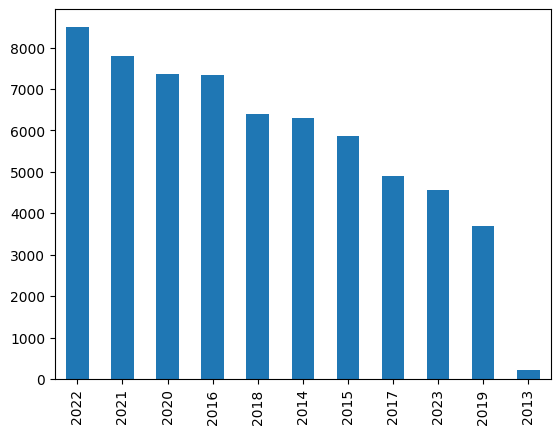

In [31]:
# plot the bar graph of no of tweets yearwise
df['year'] = pd.DatetimeIndex(df['Datetime']).year
df['year'].value_counts().plot(kind='bar')
plt.show()

In [32]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,year
11,2023-06-06 06:49:01+00:00,1665974056200577029,LIVE Congress party briefing by Ms SupriyaShri...,INCIndia,2758,2023
19,2023-06-06 01:05:46+00:00,1665887671905062913,On his birth anniversary we pay homage to free...,INCIndia,881,2023
27,2023-06-05 10:32:40+00:00,1665667947837390855,LIVE Congress party briefing by Shri BHAKTACHA...,INCIndia,994,2023
32,2023-06-05 06:01:41+00:00,1665599753730809856,Congress President Shri kharge writes a letter...,INCIndia,1582,2023
39,2023-06-05 01:28:50+00:00,1665531090872975360,As India ranks last in the Environment Perform...,INCIndia,1018,2023


In [33]:
# tweet that got highest number of likeCount
df[df['likeCount'] == df['likeCount'].max()]

,Datetime,Tweet Id,Text,Username,likeCount,year
2603,2023-03-13 09:10:54+00:00,1635206793885519874,LootLoot httpstco6ztby1n3wd,INCIndia,53651,2023


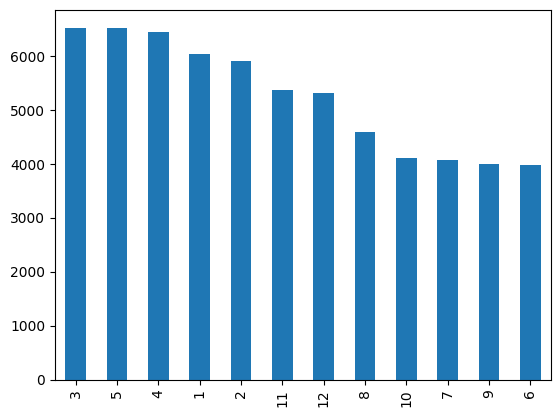

In [34]:
# visualise the the no of tweets per month
df['month'] = pd.DatetimeIndex(df['Datetime']).month
df['month'].value_counts().plot(kind='bar')
plt.show()

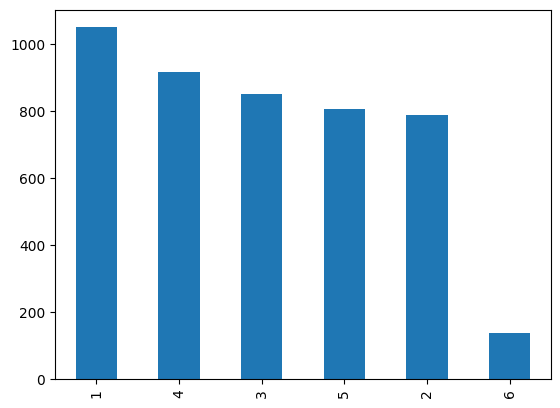

In [35]:
# bar plot of tweets in 2023 by monthwise
df[df['year'] == 2023]['month'].value_counts().plot(kind='bar')
plt.show()

In the current year, most tweets are posted in January followed by April. <br>
PS: This data is only till 6th June.

In [36]:
# saving the dataframe to csv file
df.to_csv('BJP4India_cleaned.csv', index=False)

#### Tweet Sentiment Analysis

Sentiment Analysis: Sentiment analysis is a natural language processing technique used to determine the emotional tone of a piece of text, such as positive, negative, or neutral. It involves analyzing the words, phrases, and context to classify the sentiment expressed. The goal is to understand and quantify the subjective sentiment or opinion conveyed in the text, which can be useful for various applications like social media monitoring, customer feedback analysis, and brand reputation management.

Here two techniques are used for sentiment analysis: <br>
1. VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from Huggingface

##### 1. VADER (Valence Aware Dictionary and Sentiment Reasoner)

Advantages of using VADER for sentiment analysis:
1. Simplicity: VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-trained lexicon-based approach that does not require extensive training data or complex models. It offers a simple and ready-to-use solution for sentiment analysis tasks. <br>
2. Domain Adaptability: VADER is designed to handle sentiment analysis across different domains. It uses a combination of lexical features, grammar rules, and heuristics to interpret sentiment, allowing it to work reasonably well in various contexts without extensive customization.<br>
3. Fine-grained Sentiment: VADER provides not only the overall sentiment polarity (positive, negative, or neutral) but also a measure of sentiment intensity. It assigns sentiment scores to individual words and incorporates their contextual valence to capture subtle variations in sentiment strength.

Disadvantages of using VADER for sentiment analysis:
1. Reliance on Lexicons: VADER's effectiveness heavily relies on the quality and coverage of its underlying lexicons. If specific domain-specific or colloquial terms are not adequately represented in the lexicon, VADER may struggle to accurately capture the sentiment.<br>
2. Limited Contextual Understanding: VADER primarily relies on lexical and grammatical patterns, which may limit its ability to understand more nuanced or complex language structures. It may struggle with sarcasm, irony, or sentiment expressed through subtle linguistic cues.<br>
3. Lack of Targeted Sentiment Analysis: While VADER performs well at overall sentiment analysis, it may not be the ideal choice for tasks that require targeted sentiment analysis at the aspect or entity level. It does not explicitly handle the identification of sentiment towards specific entities or aspects within a sentence.

In [37]:
df = pd.read_csv('BJP4India_cleaned.csv')

In [38]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,year,month
0,2023-06-06 06:49:01+00:00,1665974056200577029,LIVE Congress party briefing by Ms SupriyaShri...,INCIndia,2758,2023,6
1,2023-06-06 01:05:46+00:00,1665887671905062913,On his birth anniversary we pay homage to free...,INCIndia,881,2023,6
2,2023-06-05 10:32:40+00:00,1665667947837390855,LIVE Congress party briefing by Shri BHAKTACHA...,INCIndia,994,2023,6
3,2023-06-05 06:01:41+00:00,1665599753730809856,Congress President Shri kharge writes a letter...,INCIndia,1582,2023,6
4,2023-06-05 01:28:50+00:00,1665531090872975360,As India ranks last in the Environment Perform...,INCIndia,1018,2023,6


In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [41]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [42]:
# Initializing the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [43]:
sia.polarity_scores('Natural Language Processing is fun!')

{'neg': 0.0, 'neu': 0.33, 'pos': 0.67, 'compound': 0.7263}

In [44]:
sia.polarity_scores('Quantum entalgement is a very hard concept to understand!')

{'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'compound': -0.2465}

In [45]:
# run the polarity_scores() method on each tweet and append the results to a new column in the dataframe
df['polarity_score'] = df['Text'].apply(lambda x: sia.polarity_scores(x))

In [46]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,year,month,polarity_score
0,2023-06-06 06:49:01+00:00,1665974056200577029,LIVE Congress party briefing by Ms SupriyaShri...,INCIndia,2758,2023,6,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp..."
1,2023-06-06 01:05:46+00:00,1665887671905062913,On his birth anniversary we pay homage to free...,INCIndia,881,2023,6,"{'neg': 0.027, 'neu': 0.74, 'pos': 0.233, 'com..."
2,2023-06-05 10:32:40+00:00,1665667947837390855,LIVE Congress party briefing by Shri BHAKTACHA...,INCIndia,994,2023,6,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp..."
3,2023-06-05 06:01:41+00:00,1665599753730809856,Congress President Shri kharge writes a letter...,INCIndia,1582,2023,6,"{'neg': 0.289, 'neu': 0.623, 'pos': 0.088, 'co..."
4,2023-06-05 01:28:50+00:00,1665531090872975360,As India ranks last in the Environment Perform...,INCIndia,1018,2023,6,"{'neg': 0.136, 'neu': 0.817, 'pos': 0.047, 'co..."


In [47]:
# separate the polarity score into four separate columns
df = pd.concat([df.drop(['polarity_score'], axis=1), df['polarity_score'].apply(pd.Series)], axis=1)


In [48]:
# add year column
df['year'] = pd.DatetimeIndex(df['Datetime']).year

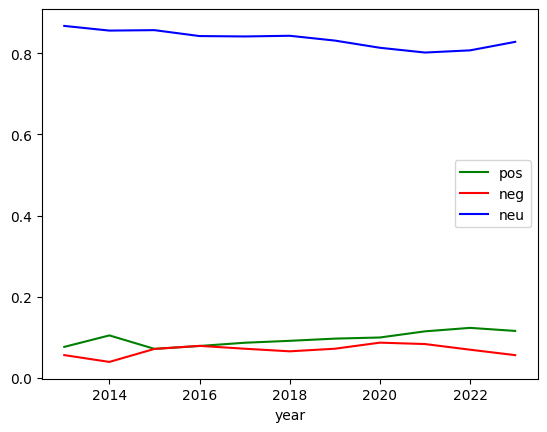

In [49]:
# plot the line graph of positive, negative, neutral scores by yearwise side by side
df.groupby('year')['pos'].mean().plot(kind='line', color='green')
df.groupby('year')['neg'].mean().plot(kind='line', color='red')
df.groupby('year')['neu'].mean().plot(kind='line', color='blue')
plt.legend()
plt.show()

In [50]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,year,month,neg,neu,pos,compound
0,2023-06-06 06:49:01+00:00,1665974056200577029,LIVE Congress party briefing by Ms SupriyaShri...,INCIndia,2758,2023,6,0.000,0.787,0.213,0.4019
1,2023-06-06 01:05:46+00:00,1665887671905062913,On his birth anniversary we pay homage to free...,INCIndia,881,2023,6,0.027,0.740,0.233,0.8979
2,2023-06-05 10:32:40+00:00,1665667947837390855,LIVE Congress party briefing by Shri BHAKTACHA...,INCIndia,994,2023,6,0.000,0.787,0.213,0.4019
3,2023-06-05 06:01:41+00:00,1665599753730809856,Congress President Shri kharge writes a letter...,INCIndia,1582,2023,6,0.289,0.623,0.088,-0.8442
4,2023-06-05 01:28:50+00:00,1665531090872975360,As India ranks last in the Environment Perform...,INCIndia,1018,2023,6,0.136,0.817,0.047,-0.7076


1. Negative (neg): This score represents the probability or intensity of negative sentiment in the given text. It measures the extent to which the text expresses negativity or a negative emotional tone. A higher neg score indicates a stronger negative sentiment.

2. Neutral (neu): The neu score indicates the probability or intensity of neutral sentiment in the text. It measures the degree of neutrality or lack of strong emotional sentiment. A higher neu score suggests a more neutral or unbiased expression.

3. Positive (pos): The pos score reflects the probability or intensity of positive sentiment in the text. It measures the extent to which the text conveys positivity or a positive emotional tone. A higher pos score indicates a stronger positive sentiment.

4. Compound: The compound score represents an overall normalized sentiment score that combines the positive, negative, and neutral scores. It provides a single aggregated measure of sentiment that ranges from -1 to 1, where -1 indicates highly negative sentiment, 0 represents neutral sentiment, and 1 indicates highly positive sentiment.

In [51]:
# drop neg neu pos columns
df.drop(['neg', 'neu', 'pos'], axis=1, inplace=True)

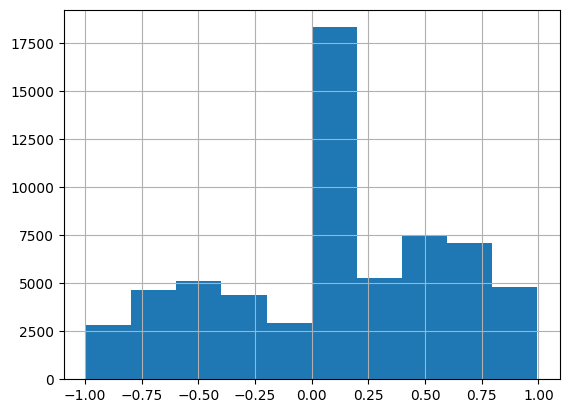

In [52]:
# plot the histogram of compound scores
df['compound'].hist()
plt.show()

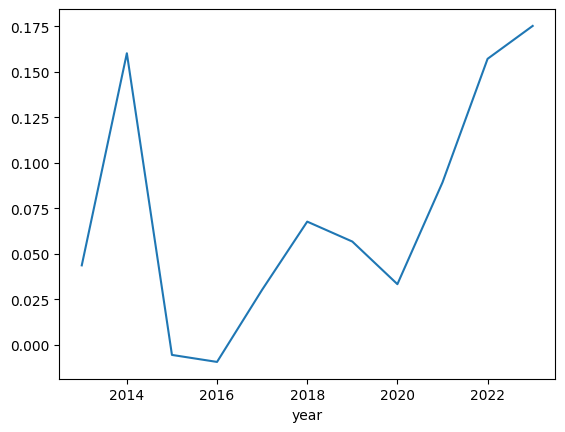

In [53]:
# plot line graph of compound scores yearwise
df.groupby('year')['compound'].mean().plot(kind='line')
plt.show()

In [54]:
# drop the year column
df.drop('year', axis=1, inplace=True)
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,month,compound
0,2023-06-06 06:49:01+00:00,1665974056200577029,LIVE Congress party briefing by Ms SupriyaShri...,INCIndia,2758,6,0.4019
1,2023-06-06 01:05:46+00:00,1665887671905062913,On his birth anniversary we pay homage to free...,INCIndia,881,6,0.8979
2,2023-06-05 10:32:40+00:00,1665667947837390855,LIVE Congress party briefing by Shri BHAKTACHA...,INCIndia,994,6,0.4019
3,2023-06-05 06:01:41+00:00,1665599753730809856,Congress President Shri kharge writes a letter...,INCIndia,1582,6,-0.8442
4,2023-06-05 01:28:50+00:00,1665531090872975360,As India ranks last in the Environment Perform...,INCIndia,1018,6,-0.7076


An average compound score of 0.07605211961357569 indicates a slightly positive sentiment in the given text. The compound score ranges from -1 to 1, where values closer to -1 indicate strong negative sentiment, values closer to 1 indicate strong positive sentiment, and values around 0 suggest a more neutral sentiment.
<br>In this case, the positive sentiment is relatively weak, as the compound score is closer to 0 than to 1. It suggests that the text has some positive elements but may also contain elements of neutral or slightly negative sentiment. 

##### 2. Roberta Pretrained Model from Huggingface

In [55]:
!pip3 install transformers
!pip3 install scipy
!pip3 install torch
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
!pip3 install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [58]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [59]:
# Run for Roberta 
example = "I hate you"

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9654269, 'roberta_neu': 0.028996332, 'roberta_pos': 0.0055766553}


In [60]:
# apply the model on each tweet and append the results to a new column in the dataframe and also show the progress bar
def get_sentiment(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict



In [62]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,month,compound
0,2023-06-06 06:49:01+00:00,1665974056200577029,LIVE Congress party briefing by Ms SupriyaShri...,INCIndia,2758,6,0.4019
1,2023-06-06 01:05:46+00:00,1665887671905062913,On his birth anniversary we pay homage to free...,INCIndia,881,6,0.8979
2,2023-06-05 10:32:40+00:00,1665667947837390855,LIVE Congress party briefing by Shri BHAKTACHA...,INCIndia,994,6,0.4019
3,2023-06-05 06:01:41+00:00,1665599753730809856,Congress President Shri kharge writes a letter...,INCIndia,1582,6,-0.8442
4,2023-06-05 01:28:50+00:00,1665531090872975360,As India ranks last in the Environment Perform...,INCIndia,1018,6,-0.7076


In [63]:
dfdummy = df.head(100)

In [64]:
# apply the get_sentiment() function on each tweet and append the results to a new column in the dataframe 
dfdummy['roberta_scores'] = dfdummy['Text'].apply(get_sentiment)

<ipython-input-64-58769a93e1f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdummy['roberta_scores'] = dfdummy['Text'].apply(get_sentiment)


In [65]:
dfdummy.head()

,Datetime,Tweet Id,Text,Username,likeCount,month,compound,roberta_scores
0,2023-06-06 06:49:01+00:00,1665974056200577029,LIVE Congress party briefing by Ms SupriyaShri...,INCIndia,2758,6,0.4019,"{'roberta_neg': 0.03298899, 'roberta_neu': 0.9..."
1,2023-06-06 01:05:46+00:00,1665887671905062913,On his birth anniversary we pay homage to free...,INCIndia,881,6,0.8979,"{'roberta_neg': 0.0022873245, 'roberta_neu': 0..."
2,2023-06-05 10:32:40+00:00,1665667947837390855,LIVE Congress party briefing by Shri BHAKTACHA...,INCIndia,994,6,0.4019,"{'roberta_neg': 0.038033888, 'roberta_neu': 0...."
3,2023-06-05 06:01:41+00:00,1665599753730809856,Congress President Shri kharge writes a letter...,INCIndia,1582,6,-0.8442,"{'roberta_neg': 0.26687244, 'roberta_neu': 0.6..."
4,2023-06-05 01:28:50+00:00,1665531090872975360,As India ranks last in the Environment Perform...,INCIndia,1018,6,-0.7076,"{'roberta_neg': 0.8669818, 'roberta_neu': 0.12..."


In [66]:
df.shape

(62936, 7)

In [67]:
# apply the get_sentiment() function on each tweet and append the results to a new column in the dataframe
df['roberta_scores'] = df['Text'].apply(get_sentiment)

In [68]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,month,compound,roberta_scores
0,2023-06-06 06:49:01+00:00,1665974056200577029,LIVE Congress party briefing by Ms SupriyaShri...,INCIndia,2758,6,0.4019,"{'roberta_neg': 0.03298899, 'roberta_neu': 0.9..."
1,2023-06-06 01:05:46+00:00,1665887671905062913,On his birth anniversary we pay homage to free...,INCIndia,881,6,0.8979,"{'roberta_neg': 0.0022873245, 'roberta_neu': 0..."
2,2023-06-05 10:32:40+00:00,1665667947837390855,LIVE Congress party briefing by Shri BHAKTACHA...,INCIndia,994,6,0.4019,"{'roberta_neg': 0.038033888, 'roberta_neu': 0...."
3,2023-06-05 06:01:41+00:00,1665599753730809856,Congress President Shri kharge writes a letter...,INCIndia,1582,6,-0.8442,"{'roberta_neg': 0.26687244, 'roberta_neu': 0.6..."
4,2023-06-05 01:28:50+00:00,1665531090872975360,As India ranks last in the Environment Perform...,INCIndia,1018,6,-0.7076,"{'roberta_neg': 0.8669818, 'roberta_neu': 0.12..."


In [69]:
# save the dataframe to csv file
df.to_csv('INCIndiaa_VADER_ROBERTA_done.csv', index=False)

In [70]:
# create a year column
df['year'] = pd.DatetimeIndex(df['Datetime']).year

In [72]:
# seprate the roberta_scores column into three separate columns
df = pd.concat([df.drop(['roberta_scores'], axis=1), df['roberta_scores'].apply(pd.Series)], axis=1)

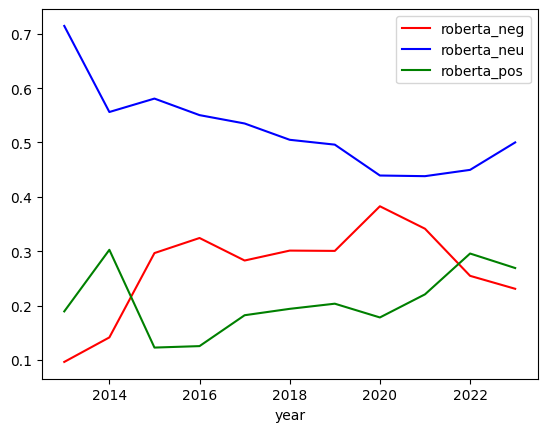

In [73]:
# calculate the mean of roberta_neg, roberta_neu, roberta_pos columns and plot the line graph
df.groupby('year')['roberta_neg'].mean().plot(kind='line', color='red')
df.groupby('year')['roberta_neu'].mean().plot(kind='line', color='blue')
df.groupby('year')['roberta_pos'].mean().plot(kind='line', color='green')   
plt.legend()
plt.show()

##### End Comparison

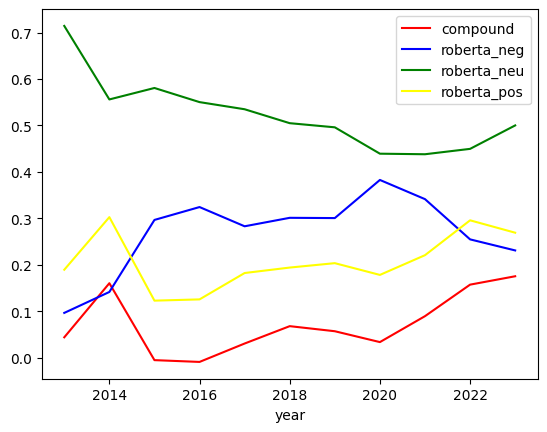

In [74]:
# comparision of VADER and ROBERTA
df.groupby('year')['compound'].mean().plot(kind='line', color='red')
df.groupby('year')['roberta_neg'].mean().plot(kind='line', color='blue')
df.groupby('year')['roberta_neu'].mean().plot(kind='line', color='green')
df.groupby('year')['roberta_pos'].mean().plot(kind='line', color='yellow')
plt.legend()
plt.show()

In [77]:
# mean roberta_neg, roberta_neu, roberta_pos scores
ro_neg_mean = df['roberta_neg'].mean()
ro_neu_mean = df['roberta_neu'].mean()
ro_pos_mean = df['roberta_pos'].mean()
compound_mean = df['compound'].mean()

In [78]:
print(ro_neg_mean, ro_neu_mean, ro_pos_mean, compound_mean)

0.2883963 0.50115585 0.21044777 0.07605211961357569
